## Mall Customer Segmentation using K Clustering.
#### Problem Statement
Imagine a scenario where you own a shopping mall and want to segregate customers and give them a spending score in order to focus more marketing strategies on them

In [1]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#data statistics
df.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [6]:
df.shape

(200, 5)

In [7]:
#exploratory data analysis
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

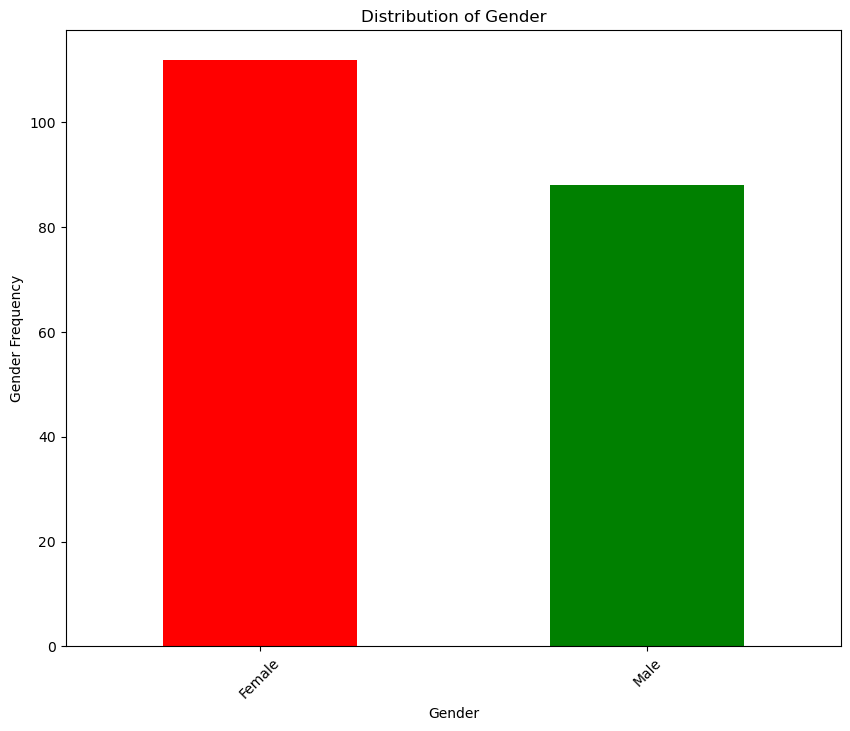

In [16]:
grouped_gender = df.groupby('Gender')['CustomerID'].size()
plt.figure(figsize = (10,8))
grouped_gender.plot(kind='bar', color = ['r','g','b'])
plt.ylabel('Gender Frequency')
plt.title('Distribution of Gender')
plt.xticks(rotation = 45);

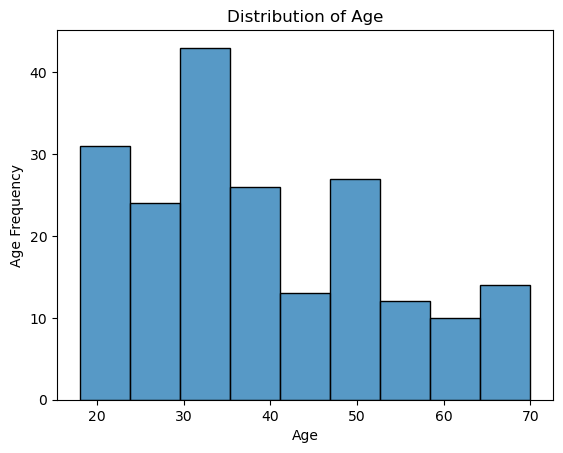

In [23]:
#checking Age distribution
sns.histplot(x='Age',data = df)
plt.ylabel('Age Frequency')
plt.title('Distribution of Age');

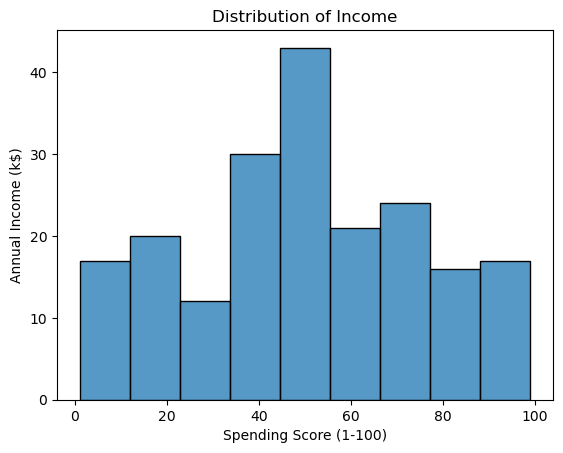

In [28]:
#Distribution of annual income
sns.histplot(x='Spending Score (1-100)',data = df)
plt.ylabel('Annual Income (k$)')
plt.title('Distribution of Income');

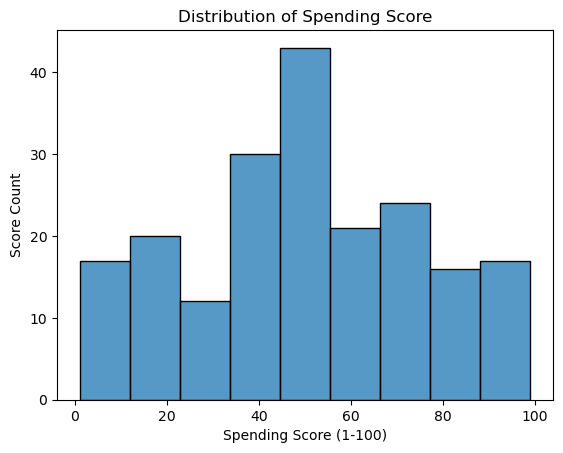

In [27]:
#Distribution of spending score
sns.histplot(x='Spending Score (1-100)',data = df)
plt.ylabel('Score Count')
plt.title('Distribution of Spending Score');

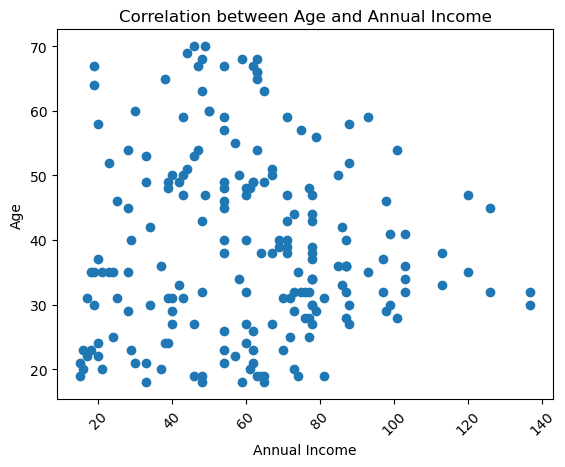

In [34]:
#checking correlation between Age and annual income
plt.scatter(x=df['Annual Income (k$)'], y = df['Age'])
plt.ylabel('Age')
plt.title('Correlation between Age and Annual Income')
plt.xlabel('Annual Income')
plt.xticks(rotation = 45);

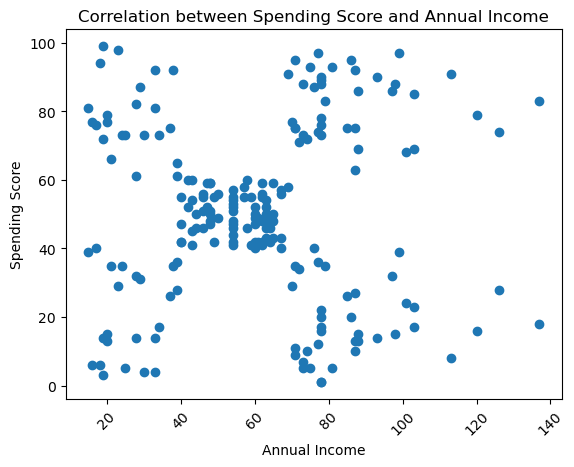

In [32]:
#checking correlation between spending score and income count
plt.scatter(x=df['Annual Income (k$)'], y = df['Spending Score (1-100)'])
plt.ylabel('Spending Score')
plt.title('Correlation between Spending Score and Annual Income')
plt.xlabel('Annual Income')
plt.xticks(rotation = 45);

In [36]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]
print(X.head(5))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [37]:
#Data scaling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling Annual Income and Spending Score
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

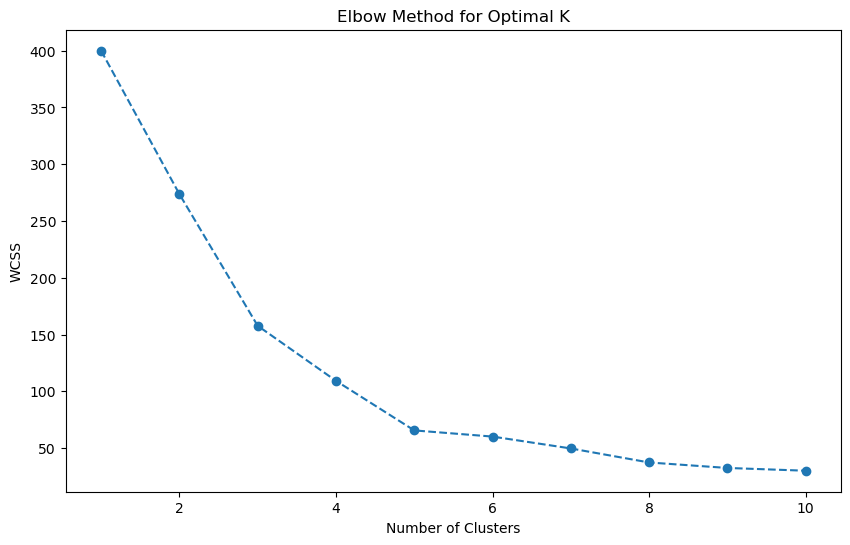

In [38]:
#Selecting Optimal K value
# Trying Different Values of K
wcss = []  # Within-Cluster-Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
!pip install --upgrade kneed

The Knee located at figure: 5


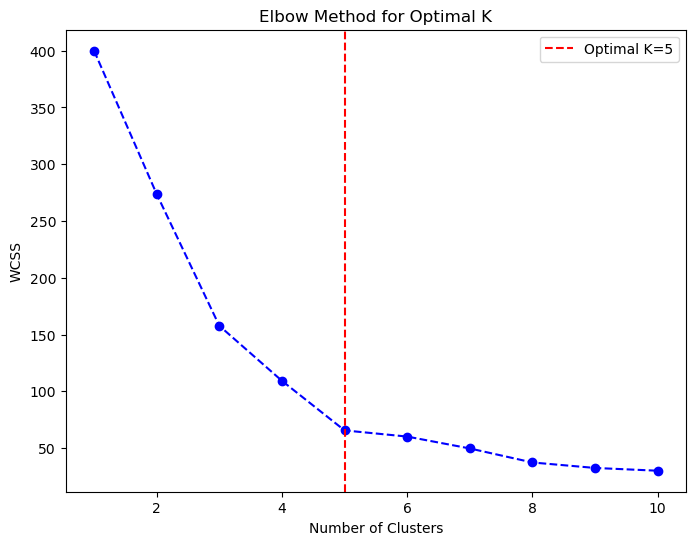

In [40]:
# import the kneed module for Elbow Method
from kneed import KneeLocator

# Applying the Elbow method to determine the number of clusters
wcss = []

for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Using KneeLocator to find the elbow
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, 'o--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=kl.elbow, color='red', linestyle='--', label=f"Optimal K={kl.elbow}")
plt.legend()
plt.show()

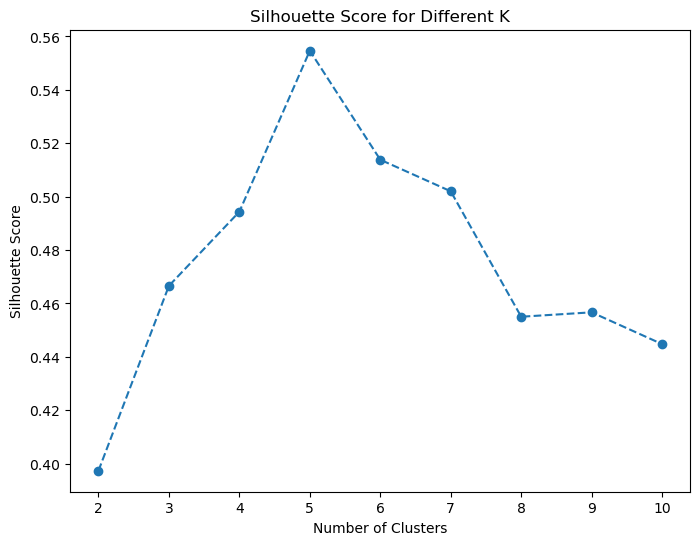

In [41]:
#selecting K using Silohutte score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11): # Test different values of K (from 2 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)  # Use 'scaled_data' if your data is scaled
    score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(score)

# Visualizing the results
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

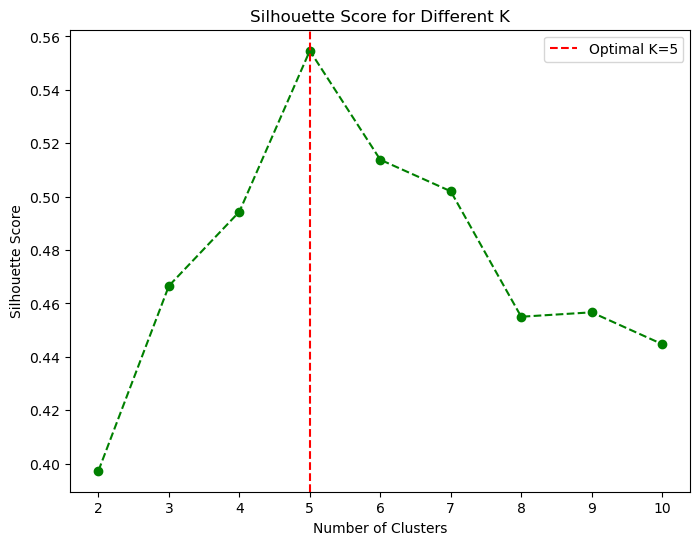

In [42]:
from sklearn.metrics import silhouette_score

# List of Silhouette Scores
silhouette_coef = []

# Clustering and calculating the Silhouette Score
for cluster in range(2, 11):  # Silhouette method requires at least 2 clusters
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coef.append(score)
# Silhouette Graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_coef, 'o--', color='green')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.axvline(x=kl.elbow, color='red', linestyle='--', label=f"Optimal K={kl.elbow}")
plt.legend()
plt.show()

In [43]:
#Training the K means Model
from sklearn.cluster import KMeans

# Create and train the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Get the cluster assignment for each customer
clusters = kmeans.labels_

# Add the results to the dataset
df['Cluster'] = clusters

# Check the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Check the cluster distribution
print("Cluster Distribution:")
print(df['Cluster'].value_counts())

Cluster Centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]
Cluster Distribution:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [44]:
## Model fitting with 5 clusters 
clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(scaled_data)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

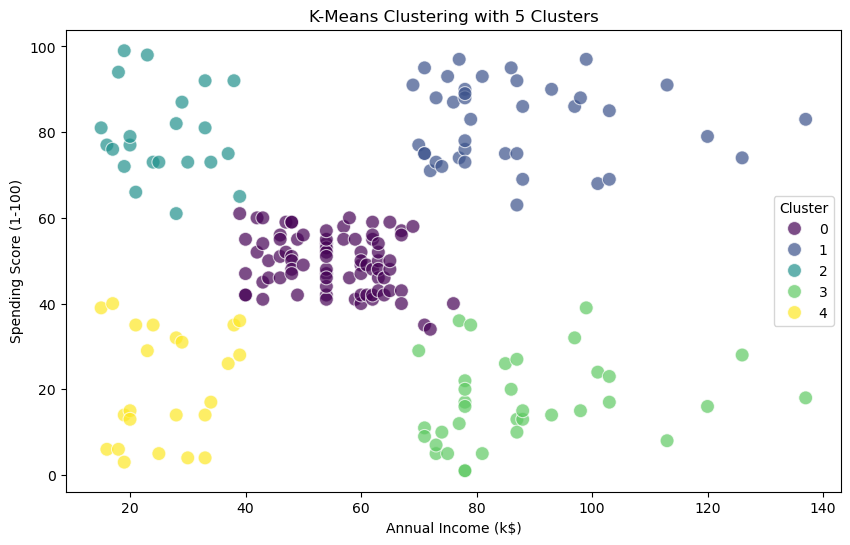

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering with 5 Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [49]:
## Creating a New Dataframe with an appended cluster column
df_Kmeans = df.copy()            
df_Kmeans['Cluster'] = y_kmeans 
print(df_Kmeans.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


In [51]:
from sklearn.preprocessing import MinMaxScaler
#creating and training an hierachical model
hierar_scaled_data = MinMaxScaler()

# Return the scaled data as a DataFrame
X_Hierarchial = pd.DataFrame(hierar_scaled_data.fit_transform(X), columns=X.columns)
print(X_Hierarchial.head(5))

   Annual Income (k$)  Spending Score (1-100)
0            0.000000                0.387755
1            0.000000                0.816327
2            0.008197                0.051020
3            0.008197                0.775510
4            0.016393                0.397959


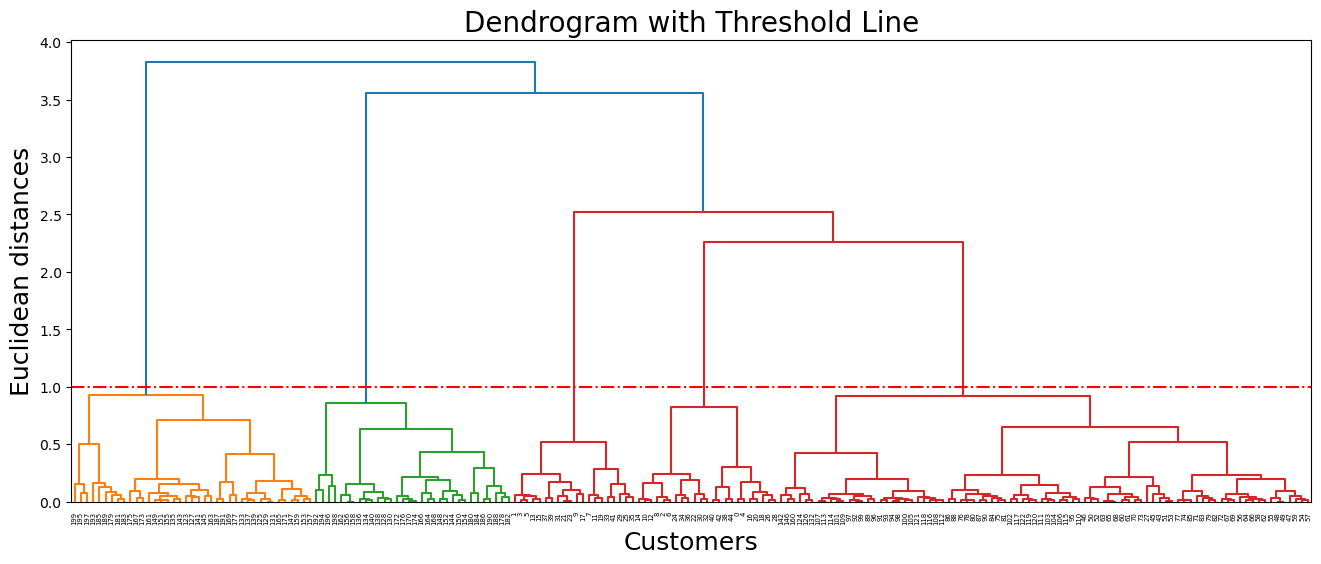

In [53]:
## Draw the threshold level to identify the ideal number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(
    shc.linkage(X_Hierarchial, method='ward')
)
plt.axhline(y=1, color='r', linestyle='dashdot')  # Threshold line with dashdot style

plt.title('Dendrogram with Threshold Line', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

In [55]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering Model
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
cluster_labels = hierarchical_clustering.fit_predict(X_Hierarchial)

# Check the Results
print(cluster_labels)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [56]:
## Creating a New Dataframe with an appended cluster column

df_Hierarchial = df.copy()   ## making a copy of original dataframe
df_Hierarchial['Cluster'] = cluster_labels  ## appending the cluster column
print(df_Hierarchial.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


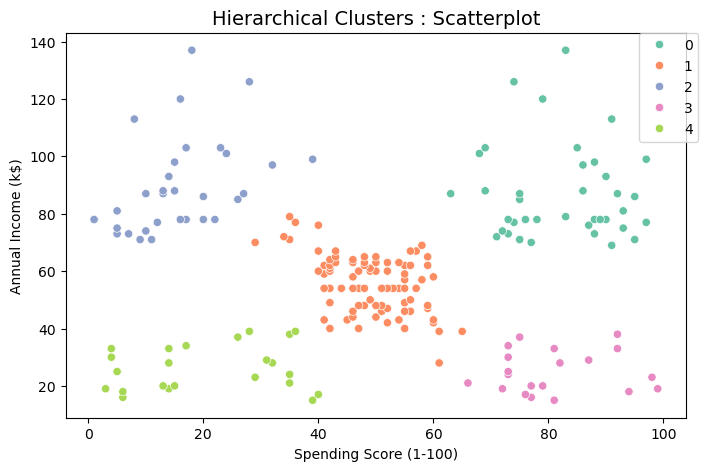

In [58]:
# Visualizing the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8, 5))
plt.title('Hierarchical Clusters : Scatterplot', fontsize=14)

# Scatterplot for clusters
sns.scatterplot(data=df_Hierarchial, 
                x='Spending Score (1-100)', 
                y='Annual Income (k$)', 
                hue='Cluster', 
                palette="Set2")

# Adjust legend position
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()


In [62]:
!pip install squarify

C:\Users\Dr Afolabi\AppData\Local\Temp\ipykernel_4636\2703443588.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Cluster", data=df_Kmeans, palette=my_pal, alpha=0.6)
C:\Users\Dr Afolabi\AppData\Local\Temp\ipykernel_4636\2703443588.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Cluster", data=df_Hierarchial, palette=my_col, alpha=0.6)


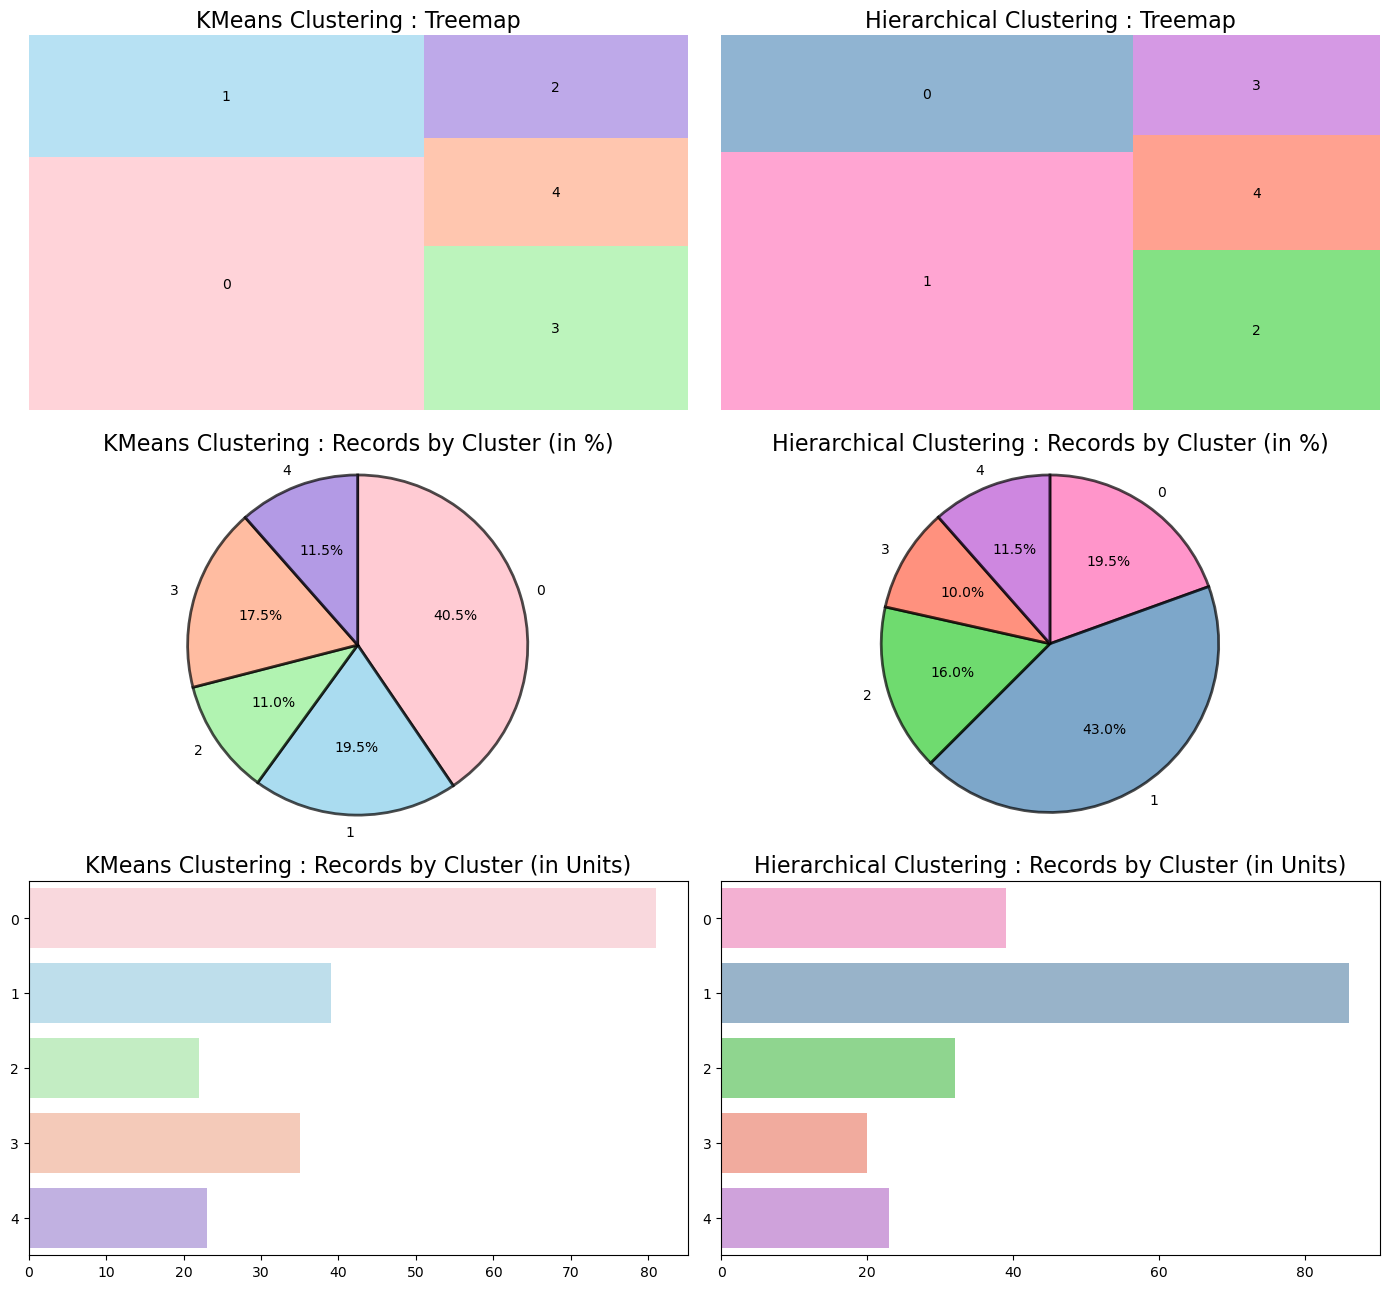

In [63]:
# Visualizing the count of records by each cluster through Treemap, pie & bar charts


import squarify


plt.subplots(figsize=(14,13))
my_pal = ('#FFB6C1','#87CEEB', '#90EE90', '#FFA07A', '#9370DB')
my_col = ('#FF69B4', '#4682B4', '#32CD32', '#FF6347','#BA55D3')

# K-Means Treemap
plt.subplot(3,2,1)
plt.title('KMeans Clustering : Treemap', fontsize=16)
labels = df_Kmeans['Cluster'].value_counts().index.tolist()
sizes = df_Kmeans['Cluster'].value_counts().values.tolist()
squarify.plot(sizes=sizes, label=labels, color=my_pal, alpha=.6)
plt.axis('off')

# Hierarchical Treemap
plt.subplot(3,2,2)
plt.title('Hierarchical Clustering : Treemap', fontsize=16)
labels = df_Hierarchial['Cluster'].value_counts().index.tolist()
sizes = df_Hierarchial['Cluster'].value_counts().values.tolist()
squarify.plot(sizes=sizes, label=labels, color=my_col, alpha=.6)
plt.axis('off')

# K-Means Pie Chart
plt.subplot(3,2,3)
plt.title('KMeans Clustering : Records by Cluster (in %)', fontsize=16)
sizes = df_Kmeans['Cluster'].value_counts(normalize=True).sort_index() * 100
labels = sizes.index
plt.pie(sizes, labels = labels, colors=my_pal, explode=[0.0]*len(labels), counterclock=False, startangle=90, wedgeprops={'alpha':0.7, 'edgecolor' : 'black','linewidth': 2}, autopct='%1.1f%%')
plt.axis('equal')

# Hierarchical Pie Chart
plt.subplot(3,2,4)
plt.title('Hierarchical Clustering : Records by Cluster (in %)', fontsize=16)
sizes = df_Hierarchial['Cluster'].value_counts(normalize=True).sort_index() * 100
labels = sizes.index
plt.pie(sizes, labels = labels, colors=my_col, explode=[0.0]*len(labels), counterclock=False, startangle=90, wedgeprops={'alpha':0.7, 'edgecolor' : 'black','linewidth': 2}, autopct='%1.1f%%')
plt.axis('equal')

# K-Means Bar Chart
plt.subplot(3,2,5)
plt.title('KMeans Clustering : Records by Cluster (in Units)', fontsize=16)
sns.countplot(y="Cluster", data=df_Kmeans, palette=my_pal, alpha=0.6)
plt.ylabel(None)
plt.xlabel(None)

# Hierarchical Bar Chart
plt.subplot(3,2,6)
plt.title('Hierarchical Clustering : Records by Cluster (in Units)', fontsize=16)
sns.countplot(y="Cluster", data=df_Hierarchial, palette=my_col, alpha=0.6)
plt.ylabel(None)
plt.xlabel(None)

plt.tight_layout()
plt.show()

### Conclusion

The results reveal that the outcomes of both K-Means and Hierarchical Clustering methods align closely, indicating consistency in their ability to identify meaningful customer segments. These segments are logically based on income and spending patterns.

These insights have practical applications in commercial settings, such as customer segmentation strategies. For instance:

Low-income, low-spending customers: Target them with budget-friendly products.
High-income, high-spending customers: Focus on promoting premium and luxury products.
Middle-income, moderate-spending customers: Offer products at mid-range price points to cater to their spending behavior.